[0.7128184  0.48593089 0.72497884 0.6345292  0.19502527 0.02298256
 0.47006063 0.41466066 0.62490616 0.33219497 0.60425377 0.51467734
 0.05112058 0.39339962 0.22269096 0.34035289 0.94930094 0.31086872
 0.84078319 0.48938217]


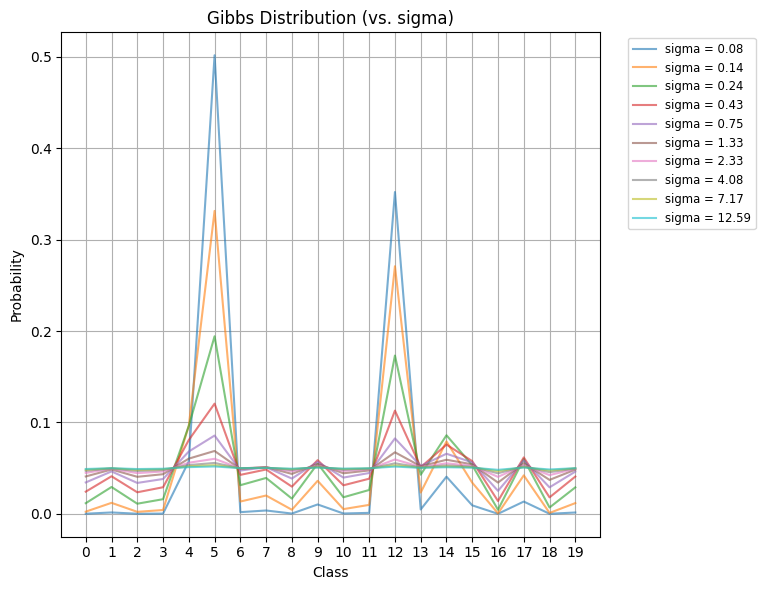

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def gibbs_prob_dist(energies, sigma):
    if sigma == 0:
        probs = np.zeros(len(energies))
        probs[np.argmin(energies)] = 1.0
        return probs
    unnormalized_probs = np.exp(-energies / sigma) 
    return unnormalized_probs / np.sum(unnormalized_probs)

k = 20
sigmas = np.logspace(-1.1, 1.1, 10)
energies = np.random.rand(k)
print(energies)

plt.figure(figsize=(8, 6))

for sigma in sigmas:
    probs = gibbs_prob_dist(energies, sigma)
    plt.plot(range(k), probs, label=f'sigma = {sigma:.2f}', alpha=0.6)

plt.xlabel('Class')
plt.ylabel('Probability')
plt.title(f'Gibbs Distribution (vs. sigma)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize='small')
plt.xticks(np.arange(k))
plt.grid(True)

plt.tight_layout()
plt.show()

/tmp/ipykernel_956984/1476738577.py:7: RuntimeWarning: overflow encountered in exp
  numerator = np.sum(np.exp(scaling_factor * energies))
/tmp/ipykernel_956984/1476738577.py:8: RuntimeWarning: overflow encountered in scalar power
  denominator = np.sum(np.exp(energies))**scaling_factor
/tmp/ipykernel_956984/1476738577.py:9: RuntimeWarning: invalid value encountered in scalar divide
  return np.log(numerator / denominator)
/tmp/ipykernel_956984/1476738577.py:9: RuntimeWarning: divide by zero encountered in log
  return np.log(numerator / denominator)
/home/ubuntu/nethome-blazejb/minimol/.minimol_p3-12/lib/python3.12/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


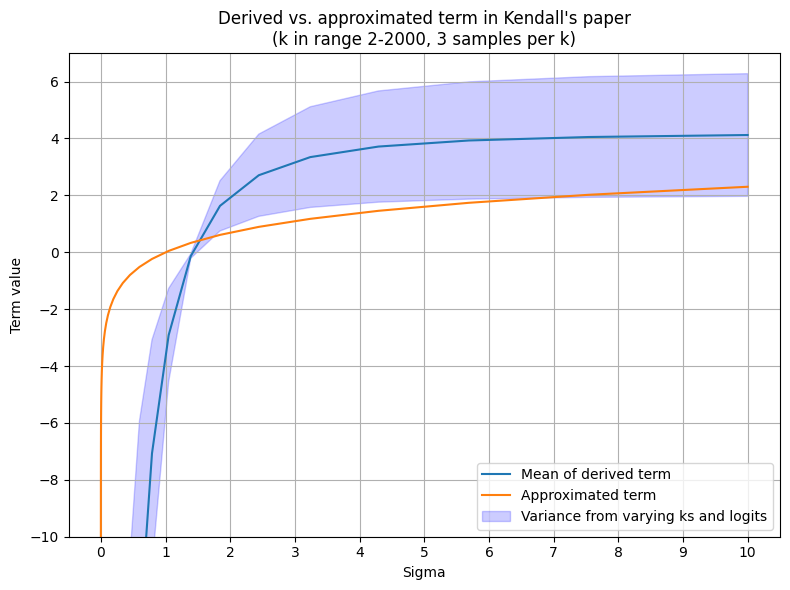

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

def reg_term(energies, sigma):
    scaling_factor = 2 / sigma**2
    numerator = np.sum(np.exp(scaling_factor * energies))
    denominator = np.sum(np.exp(energies))**scaling_factor
    return np.log(numerator / denominator)

sigmas = np.logspace(-5, 1, 50)
ks = [2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
num_samples_per_k = 3
derived_curves = []

for k in ks:
    for _ in range(num_samples_per_k):
        logits = np.random.randn(k)
        derived_terms = [reg_term(logits, sigma) for sigma in sigmas]
        derived_curves.append(derived_terms)

derived_curves = np.array(derived_curves)

mean_derived = np.mean(derived_curves, axis=0)
var_derived = np.var(derived_curves, axis=0)

plt.figure(figsize=(8, 6))
plt.plot(sigmas, mean_derived, label='Mean of derived term')

approximated_terms = np.log(sigmas)
plt.plot(sigmas, approximated_terms, label='Approximated term')

plt.fill_between(sigmas, mean_derived - np.sqrt(var_derived), mean_derived + np.sqrt(var_derived), color='blue', alpha=0.2, label='Variance from varying ks and logits')

plt.ylim(-10, 7)
# plt.xscale('log')
plt.xlabel('Sigma')s
plt.xticks(np.arange(max(sigmas) + 1))
plt.ylabel('Term value')
plt.title('Derived vs. approximated term in Kendall\'s paper\n(k in range 2-2000, 3 samples per k)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_980287/3135842539.py:10: RuntimeWarning: invalid value encountered in log
  loss_values_sigma = np.log(kendalls_loss_sigma(L_grid_sigma, sigma_grid))
/tmp/ipykernel_980287/3135842539.py:18: RuntimeWarning: invalid value encountered in log
  loss_values_weight = np.log(kendalls_loss_weight(L_grid_weight, weight_grid))


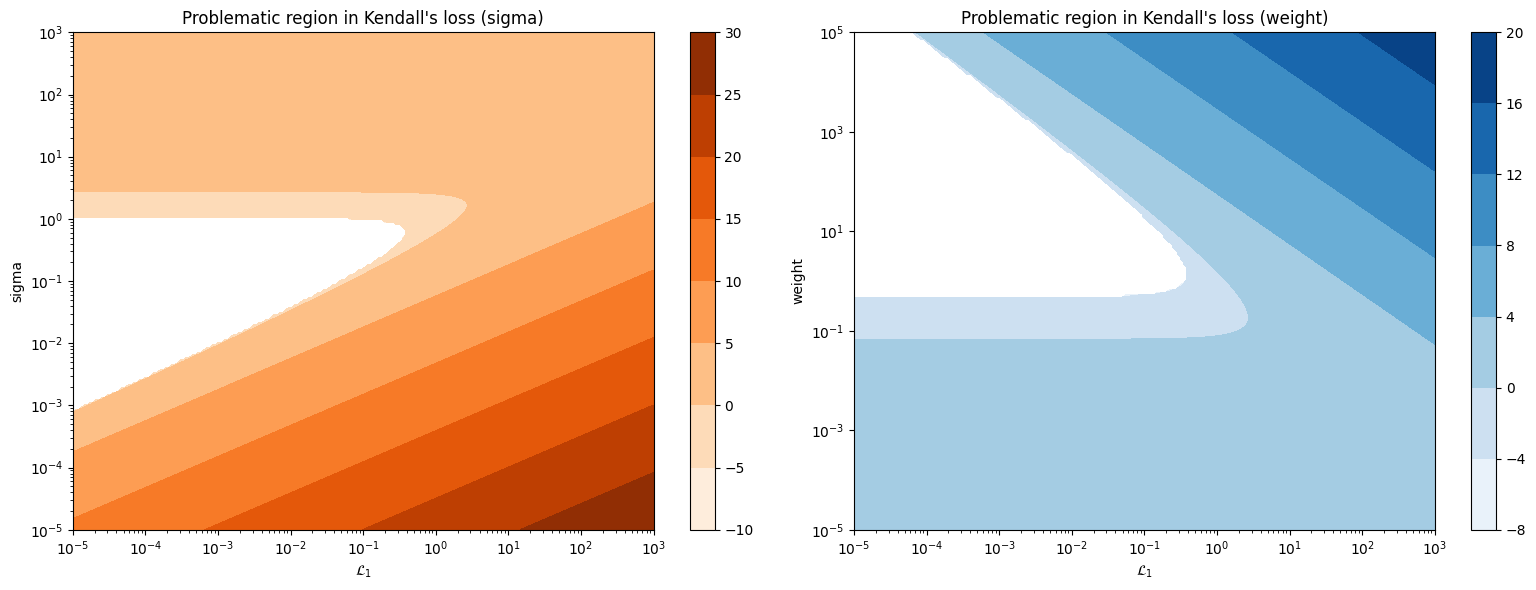

In [2]:
import numpy as np
import matplotlib.pyplot as plt

L = np.logspace(-5, 3, 200)

# figure with sigma
sigma = np.logspace(-5, 3, 200)
L_grid_sigma, sigma_grid = np.meshgrid(L, sigma)
kendalls_loss_sigma = lambda loss, std: (1 / (2 * (std**2))) * loss + np.log(std)
loss_values_sigma = np.log(kendalls_loss_sigma(L_grid_sigma, sigma_grid))

# figure with weight
# weight = 1 / (2 * sigma^2)
# So, sigma = sqrt(1 / (2 * weight))
weight = np.logspace(-5, 5, 200)
L_grid_weight, weight_grid = np.meshgrid(L, weight)
kendalls_loss_weight = lambda loss, weight: weight * loss - 0.5 * np.log(2 * weight)
loss_values_weight = np.log(kendalls_loss_weight(L_grid_weight, weight_grid))

# Plt stuff
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
cp1 = plt.contourf(L_grid_sigma, sigma_grid, loss_values_sigma, cmap='Oranges')
plt.colorbar(cp1)
plt.title("Problematic region in Kendall's loss (sigma)")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\\mathcal{L}_1$')
plt.ylabel('sigma')

plt.subplot(1, 2, 2)
cp2 = plt.contourf(L_grid_weight, weight_grid, loss_values_weight, cmap='Blues')
plt.colorbar(cp2)
plt.title("Problematic region in Kendall's loss (weight)")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\\mathcal{L}_1$')
plt.ylabel('weight')

plt.tight_layout()
plt.show()


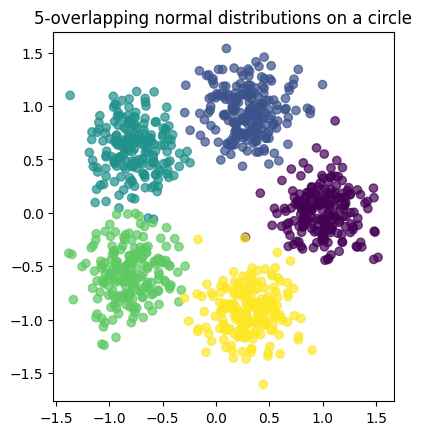

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def generate_gaussian_mixture_on_circle(n_classes=3, samples_per_class=100, radius=5.0, variance=1.0, seed=None):
    x, y = [], []
    
    np.random.seed(seed)
    angles = np.linspace(0, 2 * np.pi, n_classes, endpoint=False)
    
    for i, angle in enumerate(angles):
        mean = np.array([radius * np.cos(angle), radius * np.sin(angle)])
        covariance = np.eye(2) * variance
        samples = np.random.multivariate_normal(mean, covariance, samples_per_class)
        x.append(samples)
        y.append(np.full(samples_per_class, i))
    
    return np.vstack(x), np.hstack(y)

n_classes = 5
samples_per_class = 200
radius = 1.0
variance = 0.05

x, y = generate_gaussian_mixture_on_circle(
    seed=42,
    radius=radius,
    variance=variance,
    n_classes=n_classes,
    samples_per_class=samples_per_class, 
) 

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f"{n_classes}-overlapping normal distributions on a circle")
plt.show()

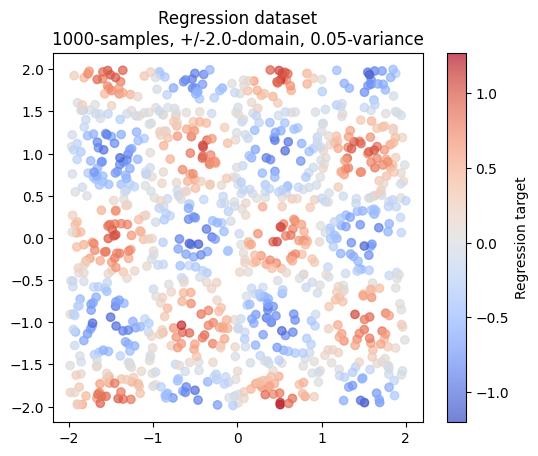

In [40]:
def generate_regression_dataset(samples=1000, domain_range=2.0, variance=0.1, seed=None):
    np.random.seed(seed)
    x1 = np.random.uniform(-domain_range, domain_range, samples)
    x2 = np.random.uniform(-domain_range, domain_range, samples)
    X_reg = np.column_stack((x1, x2))
    y_reg = np.sin(x1 * np.pi) * np.cos(x2 * np.pi) + np.random.normal(0, variance, samples)
    return X_reg, y_reg

# Parameters
samples = 1000
domain_range = 2.0
random_state = 42

# Generate regression dataset
X_reg, y_reg = generate_regression_dataset(
    samples=samples,
    domain_range=domain_range,
    random_state=random_state
)

# Visualize the input space
plt.scatter(X_reg[:, 0], X_reg[:, 1], c=y_reg, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Regression target')
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f'Regression dataset\n{samples}-samples, +/-{domain_range}-domain, {variance}-variance')
plt.show()


/tmp/ipykernel_1082341/3260279825.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


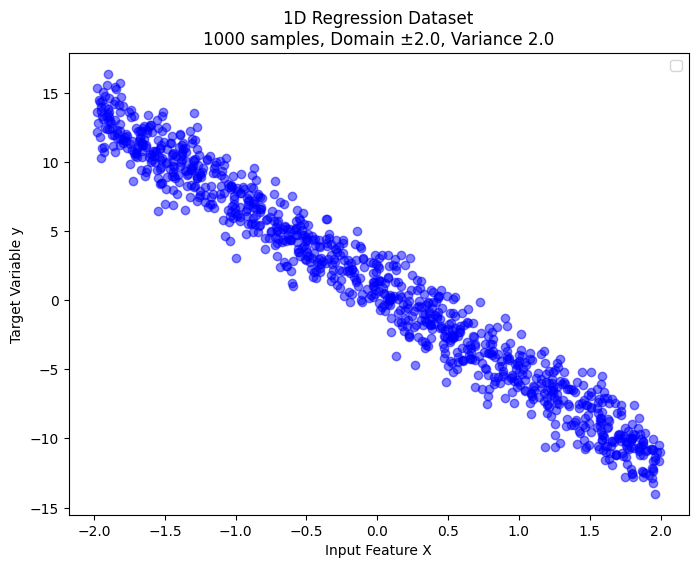

In [3]:
import random

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim


def generate_1d_regression_dataset(f, samples=1000, domain_range=2.0, variance=0.1, seed=42, as_tensors=False):
    np.random.seed(seed)
    x = np.random.uniform(-domain_range, domain_range, samples).reshape(-1, 1)
    y = f(x).flatten() + np.random.normal(0, np.sqrt(variance), samples)
    if as_tensors:
        x_tensor = torch.from_numpy(x).float()
        y_tensor = torch.from_numpy(y).float().view(-1, 1)
        return x_tensor, y_tensor
    return x, y

np.random.seed(42)

x, y = generate_1d_regression_dataset(
    f=lambda x: np.random.uniform(-10, 10) * x + np.random.uniform(-10, 10),
    samples=1000,
    domain_range=2.0,
    variance=2.0,
    seed=42
)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='blue', alpha=0.5)
plt.title(f'1D Regression Dataset\n{1000} samples, Domain ±{2.0}, Variance {2.0}')
plt.xlabel('Input Feature X')
plt.ylabel('Target Variable y')
plt.legend()
plt.show()

In [153]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


class LinearRegressionModel(nn.Module):
    def __init__(self, uw: bool = False, prior: callable = None):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)
        self.log_variance = nn.Parameter(torch.tensor(2.0), requires_grad=True) if uw else None
        self.criterion = nn.MSELoss(reduction='none')
        self.prior = prior

    def forward(self, x):
        return self.linear(x)
        
    def _get_log_sqrt_var(self):
        return 0.5 * self.log_variance if self.log_variance else None
        
    def _get_loss_weight(self):
        return 0.5 * torch.exp(-self.log_variance) if self.log_variance else None

    def compute_loss(self, y, y_true):
        if self.log_variance:
            loss = self._get_loss_weight() * self.criterion(y, y_true) + self._get_log_sqrt_var()
            loss += self.prior(self.log_variance) if self.prior else 0.0
            return torch.mean(loss)
        
        return self.criterion(y, y_true)


def run(variance             : float,
        epochs               : int       = 10, 
        samples              : int       = 1000,
        batch_size           : int       = 128,
        seed                 : int       = 42,
        lr                   : float     = 1e-1,
        prior                : callable  = None,
        uncertainty_weighing : bool      = False,
        device               : str       = 'cpu',
        verbose              : bool      = False):

    a = np.random.uniform(-10, 10)
    b = np.random.uniform(-10, 10)
    x, y = generate_1d_regression_dataset(
        f=lambda x: a * x + b,
        samples=samples,
        domain_range=2.0,
        variance=variance,
        seed=seed,
        as_tensors=True
    )

    model = LinearRegressionModel(uw=uncertainty_weighing, prior=prior).to(device)

    if isinstance(lr, tuple) or isinstance(lr, list):
        lr1 = lr[0]
        lr2 = lr[1]
    else:
        lr1 = lr2 = lr

    params = [
        {'params': model.linear.parameters(), 'lr': lr1},
        {'params': [model.log_variance],      'lr': lr2}
    ]   
    optimizer = optim.Adam(params)
    
    dataloader = DataLoader(TensorDataset(x, y), batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        epoch_loss = 0.0
        for x_batch, y_true in dataloader:
            x_batch = x_batch.to(device)
            y_true = y_true.to(device)
            optimizer.zero_grad()
            outputs = model(x_batch)
            loss = model.compute_loss(outputs, y_true)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * y_true.size(0)
            # print(f'loss: {loss.detach().cpu().numpy():.4f}, var: {torch.exp(model.log_variance).detach().cpu().numpy():.4f}')


        epoch_loss /= samples
        
        if verbose:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}')

    if uncertainty_weighing:
        return torch.exp(model.log_variance).detach().cpu().numpy()
    
    return epoch_loss

1 / 18 - 1 / 10
1 / 18 - 2 / 10
1 / 18 - 3 / 10
1 / 18 - 4 / 10
1 / 18 - 5 / 10
1 / 18 - 6 / 10
1 / 18 - 7 / 10
1 / 18 - 8 / 10
1 / 18 - 9 / 10
1 / 18 - 10 / 10
2 / 18 - 1 / 10
2 / 18 - 2 / 10
2 / 18 - 3 / 10
2 / 18 - 4 / 10
2 / 18 - 5 / 10
2 / 18 - 6 / 10
2 / 18 - 7 / 10
2 / 18 - 8 / 10
2 / 18 - 9 / 10
2 / 18 - 10 / 10
3 / 18 - 1 / 10
3 / 18 - 2 / 10
3 / 18 - 3 / 10
3 / 18 - 4 / 10
3 / 18 - 5 / 10
3 / 18 - 6 / 10
3 / 18 - 7 / 10
3 / 18 - 8 / 10
3 / 18 - 9 / 10
3 / 18 - 10 / 10
4 / 18 - 1 / 10
4 / 18 - 2 / 10
4 / 18 - 3 / 10
4 / 18 - 4 / 10
4 / 18 - 5 / 10
4 / 18 - 6 / 10
4 / 18 - 7 / 10
4 / 18 - 8 / 10
4 / 18 - 9 / 10
4 / 18 - 10 / 10
5 / 18 - 1 / 10
5 / 18 - 2 / 10
5 / 18 - 3 / 10
5 / 18 - 4 / 10
5 / 18 - 5 / 10
5 / 18 - 6 / 10
5 / 18 - 7 / 10
5 / 18 - 8 / 10
5 / 18 - 9 / 10
5 / 18 - 10 / 10
6 / 18 - 1 / 10
6 / 18 - 2 / 10
6 / 18 - 3 / 10
6 / 18 - 4 / 10
6 / 18 - 5 / 10
6 / 18 - 6 / 10
6 / 18 - 7 / 10
6 / 18 - 8 / 10
6 / 18 - 9 / 10
6 / 18 - 10 / 10
7 / 18 - 1 / 10
7 / 18 - 2 / 10
7 

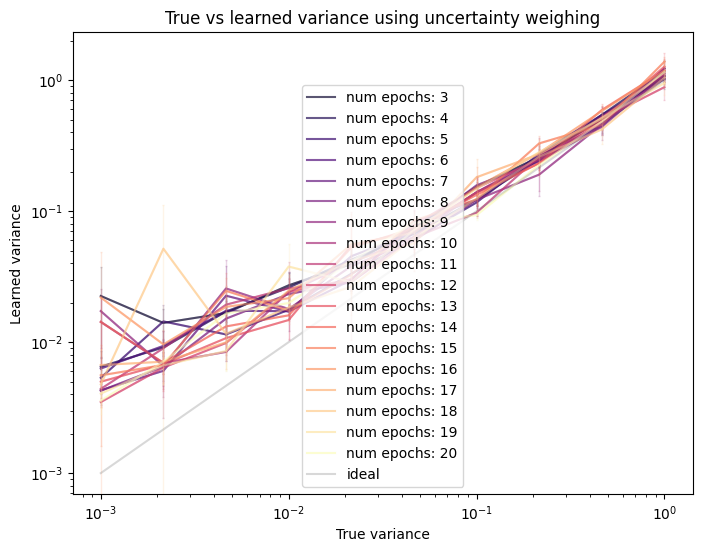

In [25]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

true_vars = np.logspace(-3, 0, 10)
# sample_sizes = [8000, 12000, 15000, 18000, 20000]
# colors = plt.cm.magma(np.linspace(0.2, 0.8, len(sample_sizes)))

# batch_sizes = [1, 2, 4, 8, 32, 64, 128, 256, 512]
# colors = plt.cm.magma(np.linspace(0.1, 1, len(batch_sizes)))

epochs = [n for n in range(3, 21)]
colors = plt.cm.magma(np.linspace(0.1, 1, len(epochs)))

# for i, sample_size in enumerate(sample_sizes):
# for i, batch_size in enumerate(batch_sizes):
for i, epoch in enumerate(epochs):
    device = torch.device('cpu')
    # device = torch.device('cuda' if torch.cuda.is_available() and batch_size >= 128 else 'cpu')

    learned_vars     = np.zeros_like(true_vars)
    std_learned_vars = np.zeros_like(true_vars)
    
    for j, variance in enumerate(true_vars):
        # print(f"{i + 1} / {len(batch_sizes)} - {j + 1} / {len(true_vars)}")
        print(f"{i + 1} / {len(epochs)} - {j + 1} / {len(true_vars)}")
        var_samples = []

        for seed in range(1, 4):
            var_samples.append(run(variance, samples=1000, epochs=epoch, lr=1e-1, seed=seed, batch_size=2, device=device, uncertainty_weighing=True))
        
        std_learned_vars[j] = np.std(var_samples)
        learned_vars[j] = np.mean(var_samples)

    plt.plot(true_vars, learned_vars, color=colors[i], alpha=0.7, label=f'num epochs: {epoch}')
    plt.errorbar(true_vars, learned_vars, yerr=std_learned_vars, color=colors[i], elinewidth=1, capsize=1, alpha=0.2)

plt.plot(true_vars, true_vars, c='gray', alpha=0.3, label='ideal')
plt.title(f'True vs learned variance using uncertainty weighing')
plt.xlabel('True variance')
plt.ylabel('Learned variance')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

[0.01       0.01895736 0.03593814 0.06812921 0.12915497 0.24484367
 0.46415888 0.87992254 1.66810054 3.16227766]
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10


<Figure size 800x600 with 0 Axes>

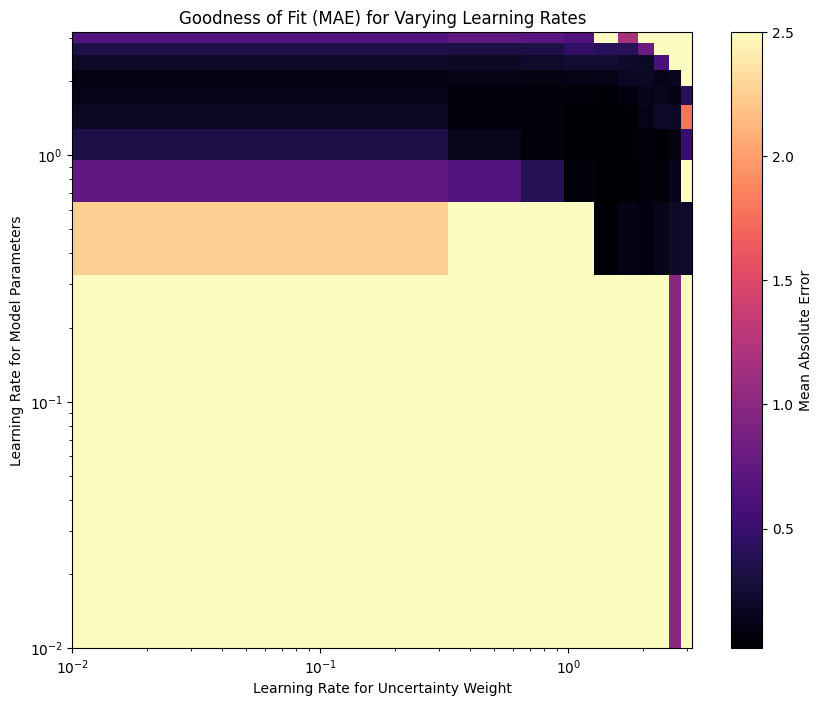

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
import scipy.stats as stats

plt.figure(figsize=(8, 6))

lrs = np.logspace(-2.0, 0.5, 10)
print(lrs)
true_vars = np.logspace(-2.0, 0.5, 10)
gofs = np.zeros((len(lrs), len(lrs)))
colors = plt.cm.magma(np.linspace(0.1, 1, len(lrs)))
device = torch.device('cpu')

for i, lr_weights in enumerate(lrs):
    print(f'{i + 1} / {len(lrs)}')
    for k, lr_uw in enumerate(lrs):
        
        learned_vars = np.zeros_like(true_vars)
        
        for j, variance in enumerate(true_vars):
            var_samples = []

            for seed in range(1, 3):
                var_samples.append(
                    run(
                        variance,
                        epochs=5,
                        seed=seed,
                        batch_size=4,
                        samples=2000,
                        device=device,
                        lr=(lr_weights, lr_uw),
                        uncertainty_weighing=True
                    )
                )

            learned_vars[j] = np.mean(var_samples)
        
        gofs[i][k] = mae(true_vars, learned_vars)

gofs_clipped = np.log(np.clip(gofs, 0, 2.5))

plt.figure(figsize=(10, 8))
plt.imshow(gofs_clipped, aspect='auto', cmap='magma', origin='lower', extent=[lrs.min(), lrs.max(), lrs.min(), lrs.max()])
plt.colorbar(label='Mean Absolute Error')
plt.xlabel('Learning Rate for Uncertainty Weight')
plt.ylabel('Learning Rate for Model Parameters')
plt.xscale('log')
plt.yscale('log')
plt.title('Goodness of Fit (MAE) for Varying Learning Rates')
plt.show()

MAE = 0.7440066323532946


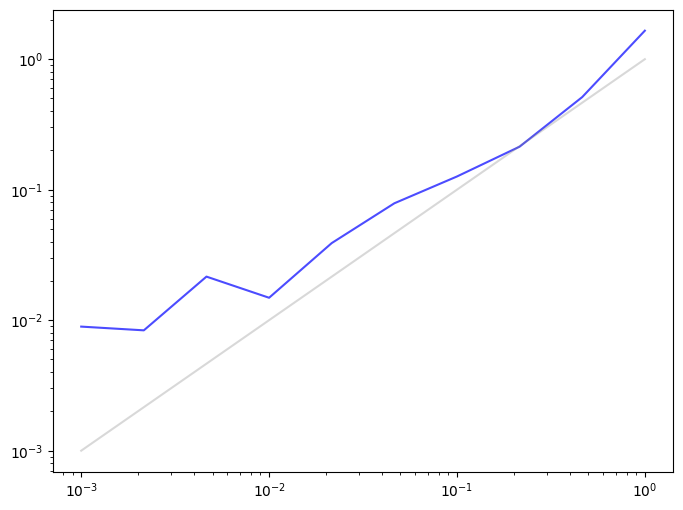

In [165]:
from sklearn.metrics import mean_absolute_error as mae

repeats = 1
true_vars = np.logspace(-3, 0, 10)
learned_vars = np.zeros_like(true_vars)

for j, variance in enumerate(true_vars):
    var_samples = []

    for seed in range(repeats):
        var_samples.append(
            run(
                variance,
                epochs=1,
                batch_size=1,
                samples=2000,
                lr=(1e-1, 1e-1),
                # prior=lambda x: x/3
                device=torch.device('cpu'),
                uncertainty_weighing=True,
            )
        )

    learned_vars[j] = np.mean(var_samples)

print(f'MAE = {mae(np.log(true_vars), np.log(learned_vars))}')
plt.figure(figsize=(8, 6))
plt.plot(true_vars, learned_vars, color='blue', alpha=0.7, label=f'estimated variance')
plt.plot(true_vars, true_vars, c='gray', alpha=0.3, label='ideal')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
import torch

repeats = 1
true_log_vars = np.logspace(-3, 0, 10)
num_samples = np.logspace(1, 5, 10)

batch_sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256]

gofs = np.zeros(shape=[len(batch_sizes), len(num_samples)])

for k, batch_size in enumerate(batch_sizes):
    print(f"{k + 1} / {len(batch_sizes)}")
    device = torch.device('cpu' if batch_size < 64 else 'cuda')
    
    for i, samples in enumerate(num_samples):

        learned_log_vars = np.zeros_like(true_log_vars)

        for j, variance in enumerate(true_log_vars):
            var_samples = []

            for seed in range(repeats):
                var_samples.append(
                    run(
                        variance,
                        epochs=1,
                        batch_size=batch_size,
                        samples=int(samples),
                        lr=(1e-1, 1e-1),
                        # prior=lambda x: x/3
                        device=device,
                        uncertainty_weighing=True,
                    )
                )

            learned_log_vars[j] = np.mean(var_samples)
        
        gofs[k][i] = mae(np.log(true_log_vars), np.log(learned_log_vars))

plt.figure(figsize=(8, 6))
cmap = plt.get_cmap("magma")
colors = [cmap(i / len(batch_sizes)) for i in range(len(batch_sizes))]
for k, batch_size in enumerate(batch_sizes):
    plt.plot(num_samples, gofs[k], color=colors[k], alpha=0.7, label=f'batch size: {batch_size}')

plt.legend(title='Batch Sizes')
plt.title('MAE[ log[ true_log_vars ], log[ learned_log_vars ] ]')
plt.xlabel('Number of Samples')
plt.ylabel('MAE')
plt.xscale('log')
plt.show()

1 / 9
2 / 9
3 / 9
4 / 9
5 / 9
6 / 9
7 / 9
8 / 9
9 / 9


TypeError: 'int' object is not iterable

<Figure size 800x600 with 0 Axes>

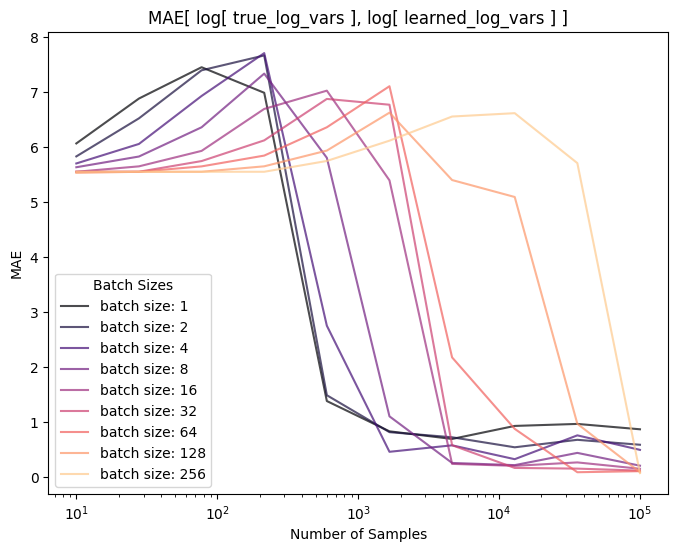

In [171]:
plt.figure(figsize=(8, 6))
cmap = plt.get_cmap("magma")
colors = [cmap(i / len(batch_sizes)) for i in range(len(batch_sizes))]
for k, batch_size in enumerate(batch_sizes):
    plt.plot(num_samples, gofs[k], color=colors[k], alpha=0.7, label=f'batch size: {batch_size}')

plt.legend(title='Batch Sizes')
plt.title('MAE[ log[ true_log_vars ], log[ learned_log_vars ] ]')
plt.xlabel('Number of Samples')
plt.ylabel('MAE')
plt.xscale('log')
plt.show()

In [47]:
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error as mae

true_vars = np.logspace(-2,1,20)
num_samples = np.floor(np.logspace(2, 4.4, 10))

corr_coeffs = []
std_corr_coeffs = []
MAEs = []
std_MAEs = []
p_values = []
std_p_values = []

for n in num_samples:
    corr_samples, p_val_samples, mae_samples = [], [], []
    for seed in range(1, 6):
        learned_vars = []
        for variance in true_vars:
            learned_vars.append(run(variance, samples=int(n), epochs=10, seed=seed, uncertainty_weighing=True))
        spearman_corr, p_value = stats.spearmanr(true_vars, learned_vars)
        mae_samples.append(mae(true_vars, learned_vars))
        p_val_samples.append(p_value)
        corr_samples.append(spearman_corr)
    # correlation coeff
    corr_coeffs.append(np.mean(corr_samples))
    std_corr_coeffs.append(np.std(corr_samples))
    # p-vals
    p_values.append(np.mean(p_val_samples))
    std_p_values.append(np.std(p_val_samples))
    # mean abs error
    MAEs.append(np.mean(mae_samples))
    std_MAEs.append(np.std(mae_samples))


In [52]:
corr     = np.asarray(corr_coeffs)
std_corr = np.asarray(std_corr_coeffs)
maes     = np.asarray(MAEs)
std_maes = np.asarray(std_MAEs)

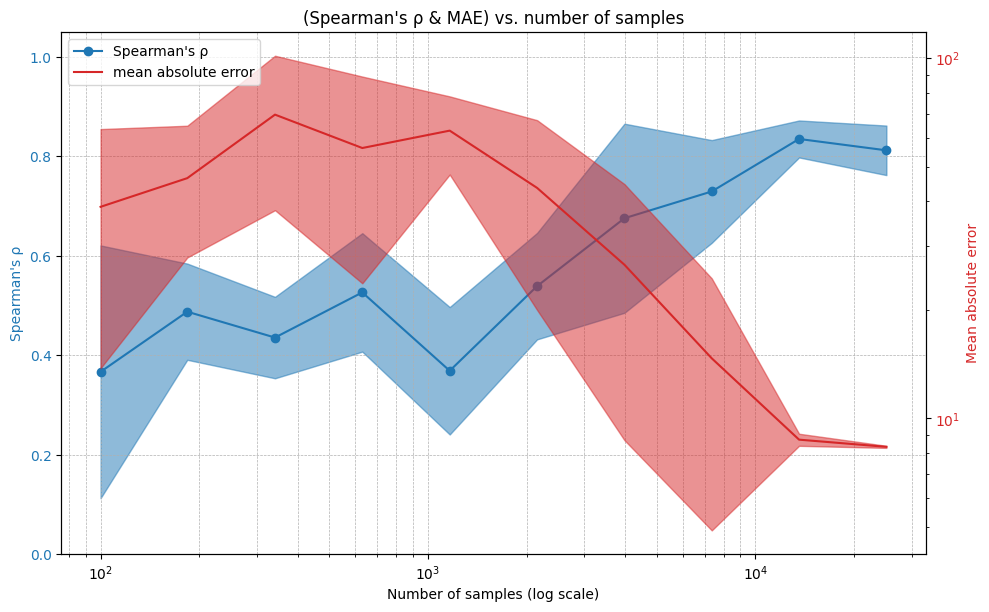

In [55]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# spearman's rho
color = 'tab:blue'
ax1.set_xlabel('Number of samples (log scale)')
ax1.set_ylabel("Spearman's ρ", color=color)
ax1.plot(num_samples, corr, marker='o', color=color, label="Spearman's ρ")
ax1.fill_between(num_samples, corr - std_corr, corr + std_corr, color=color, alpha=0.5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xscale('log')
ax1.set_ylim(0, 1.05)  # Spearman's rho ranges from -1 to 1
ax1.grid(True, which="both", ls="--", linewidth=0.5)

# mean absolute error
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Mean absolute error', color=color)  
ax2.plot(num_samples, maes, color=color, label='mean absolute error')
ax2.fill_between(num_samples, maes - std_maes, maes + std_maes, color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')
ax2.grid(False) 

fig.tight_layout() 
plt.title("(Spearman's ρ & MAE) vs. number of samples")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Display the plot
plt.show()